In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C://Users//sures//Downloads//ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

In [5]:
df.head(5)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [6]:
df.Year.value_counts()

Year
1986    311
1997    311
1988    311
1989    311
2012    311
2011    311
2010    311
2009    311
2008    311
1998    311
2007    311
1999    311
2000    311
2001    311
2002    311
2003    311
2004    311
2005    311
1987    311
2006    311
1985    311
1984    311
2016    311
1970    311
1971    311
1972    311
1973    311
1974    311
1975    311
1976    311
1977    311
1978    311
1979    311
1980    311
1981    311
1982    311
1983    311
2013    310
2014    310
2015    310
1966    310
1992    310
1994    310
1993    310
1967    310
1991    310
1990    310
1969    310
1968    310
2017    310
1996    305
1995    304
Name: count, dtype: int64

In [7]:
df.shape

(16146, 80)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [9]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [10]:
#fill numerical columns missing valueswith median
num_columns = df.select_dtypes(include=('int64','Float64')).columns
df[num_columns] = df[num_columns].apply(lambda x:x.fillna(x.median()))

In [11]:
df.columns=df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.strip()
df["state_name"] = df["state_name"].str.title()
df["dist_name"] = df["dist_name"].str.title()
df

,dist_code,year,state_code,state_name,dist_name,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),...,sugarcane_yield_(kg_per_ha),cotton_area_(1000_ha),cotton_production_(1000_tons),cotton_yield_(kg_per_ha),fruits_area_(1000_ha),vegetables_area_(1000_ha),fruits_and_vegetables_area_(1000_ha),potatoes_area_(1000_ha),onion_area_(1000_ha),fodder_area_(1000_ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [12]:
#standardize Units
area_column = [col for col in df.columns if 'area_(1000_ha)' in col]
production_column = [col for col in df.columns if 'production_(1000_tons)' in col]
yield_column = [col for col in df.columns if 'yield_(kg_per_ha)' in col]

In [13]:
#convert area column
for col in area_column:
    df[col] *=1000

In [14]:
# convert production column
for col in production_column:
    df[col] *=1000

In [16]:
rename_area = {col : col.replace('(1000_ha)','hectares') for col in area_column}
df.rename(columns=rename_area,inplace=True)

rename_production = {col : col.replace('(1000_tons)','tons') for col in production_column}
df.rename(columns=rename_production,inplace=True)


rename_yield= {col : col.replace('(kg_per_ha)','kg/hectare') for col in yield_column}
df.rename(columns=rename_yield,inplace=True)
df

df.columns = df.columns.str.replace(r'state_name','state',regex=True)
df.columns = df.columns.str.replace(r'dist_name','district',regex=True)
df

,dist_code,year,state_code,state,district,rice_area_hectares,rice_production_tons,rice_yield_kg/hectare,wheat_area_hectares,wheat_production_tons,...,sugarcane_yield_kg/hectare,cotton_area_hectares,cotton_production_tons,cotton_yield_kg/hectare,fruits_area_hectares,vegetables_area_hectares,fruits_and_vegetables_area_hectares,potatoes_area_hectares,onion_area_hectares,fodder_area_hectares
0,1,1966,14,Chhattisgarh,Durg,548000.0,185000.0,337.59,44000.0,20000.0,...,1777.78,0.0,0.0,0.0,5950.0,6640.0,12590.0,10.0,600.0,470.0
1,1,1967,14,Chhattisgarh,Durg,547000.0,409000.0,747.71,50000.0,26000.0,...,1500.00,0.0,0.0,0.0,5770.0,7240.0,13020.0,10.0,560.0,1230.0
2,1,1968,14,Chhattisgarh,Durg,556300.0,468000.0,841.27,53700.0,30000.0,...,1000.00,0.0,0.0,0.0,5410.0,7400.0,12810.0,100.0,580.0,1020.0
3,1,1969,14,Chhattisgarh,Durg,563400.0,400800.0,711.40,49400.0,26500.0,...,1900.00,0.0,0.0,0.0,5520.0,7160.0,12690.0,10.0,560.0,840.0
4,1,1970,14,Chhattisgarh,Durg,571600.0,473600.0,828.55,44200.0,29000.0,...,2000.00,0.0,0.0,0.0,5450.0,7190.0,12640.0,20.0,520.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267060.0,579700.0,2170.67,1530.0,1850.0,...,0.00,0.0,0.0,0.0,0.0,9020.0,9030.0,480.0,80.0,0.0
16142,917,2014,15,Jharkhand,Singhbhum,256330.0,586630.0,2288.57,5360.0,6650.0,...,0.00,0.0,0.0,0.0,0.0,8630.0,8640.0,460.0,40.0,0.0
16143,917,2015,15,Jharkhand,Singhbhum,263210.0,264710.0,1005.70,1990.0,1820.0,...,0.00,0.0,0.0,0.0,0.0,6840.0,6850.0,420.0,10.0,0.0
16144,917,2016,15,Jharkhand,Singhbhum,224050.0,319010.0,1423.84,380.0,830.0,...,0.00,0.0,0.0,0.0,30.0,6400.0,6430.0,30.0,10.0,0.0


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

dist_code                              0
year                                   0
state_code                             0
state                                  0
district                               0
                                      ..
vegetables_area_hectares               0
fruits_and_vegetables_area_hectares    0
potatoes_area_hectares                 0
onion_area_hectares                    0
fodder_area_hectares                   0
Length: 80, dtype: int64

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(16146, 80)

In [21]:
#summary statitics

df.describe()

,dist_code,year,state_code,rice_area_hectares,rice_production_tons,rice_yield_kg/hectare,wheat_area_hectares,wheat_production_tons,wheat_yield_kg/hectare,kharif_sorghum_area_hectares,...,sugarcane_yield_kg/hectare,cotton_area_hectares,cotton_production_tons,cotton_yield_kg/hectare,fruits_area_hectares,vegetables_area_hectares,fruits_and_vegetables_area_hectares,potatoes_area_hectares,onion_area_hectares,fodder_area_hectares
count,16146.000000,16146.000000,16146.000000,1.614600e+04,1.614600e+04,16146.000000,16146.000000,1.614600e+04,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,1.614600e+04
mean,269.769231,1991.496841,9.568562,1.285932e+05,2.248896e+05,1486.924784,77057.945621,1.820127e+05,1492.419859,22632.268054,...,4500.15306,28018.367397,7229.225195,124.644823,7750.477518,11086.249845,18677.876874,3177.038276,1194.603617,2.155033e+04
std,278.309125,15.011185,4.988538,1.600788e+05,3.266298e+05,956.185281,100394.478844,3.488343e+05,1081.255367,45062.714301,...,3153.97042,74239.648434,25042.132440,207.681147,13591.135203,18003.257384,25881.841784,8029.508625,4285.066744,6.006260e+04
min,1.000000,1966.000000,1.000000,-1.000000e+03,-1.000000e+03,-1.000000,-1000.000000,-1.000000e+03,-1.000000,-1000.000000,...,-1.00000,-1000.000000,-1000.000000,-1.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1.000000e+03
25%,78.000000,1978.000000,6.000000,1.040000e+04,9.460000e+03,800.000000,1770.000000,2.000000e+03,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,310.000000,1600.000000,2520.000000,0.000000,60.000000,0.000000e+00
50%,156.000000,1991.000000,10.000000,6.680000e+04,9.584000e+04,1333.210000,36800.000000,4.270000e+04,1347.450000,2050.000000,...,4502.21000,50.000000,0.000000,0.000000,2220.000000,4740.000000,8945.000000,390.000000,280.000000,1.200000e+03
75%,241.000000,2005.000000,12.000000,1.913900e+05,3.157150e+05,2113.517500,123000.000000,2.151925e+05,2131.580000,20900.000000,...,6704.60500,10097.500000,2000.000000,202.270000,8790.000000,12510.000000,23570.000000,3150.000000,880.000000,1.676250e+04
max,917.000000,2017.000000,20.000000,1.154230e+06,3.215010e+06,5653.830000,879490.000000,4.305500e+06,5541.520000,334800.000000,...,22062.30000,800890.000000,376610.000000,5000.000000,159540.000000,200060.000000,240990.000000,111610.000000,131350.000000,1.162660e+06


In [22]:
for col in df[["state","district"]]:
    print(df[col].unique())

['Chhattisgarh' 'Madhya Pradesh' 'Andhra Pradesh' 'Telangana' 'Karnataka'
 'Tamil Nadu' 'Maharashtra' 'Gujarat' 'Rajasthan' 'Punjab' 'Haryana'
 'Uttar Pradesh' 'Uttarakhand' 'Assam' 'Himachal Pradesh' 'Kerala'
 'Orissa' 'West Bengal' 'Bihar' 'Jharkhand']
['Durg' 'Bastar' 'Raipur' 'Bilaspur' 'Raigarh' 'Surguja' 'Jabalpur'
 'Balaghat' 'Chhindwara' 'Narsinghpur' 'Seoni / Shivani' 'Mandla' 'Sagar'
 'Damoh' 'Tikamgarh' 'Chhatarpur' 'Panna' 'Rewa' 'Sidhi' 'Satna' 'Shahdol'
 'Gwalior' 'Shivpuri' 'Guna' 'Datia' 'Morena' 'Bhind' 'Indore' 'Ratlam'
 'Ujjain' 'Mandsaur' 'Dewas' 'Dhar' 'Jhabua' 'Khargone / West Nimar'
 'Khandwa / East Nimar' 'Sehore' 'Raisen' 'Vidisha' 'Betul' 'Rajgarh'
 'Shajapur' 'Hoshangabad' 'Srikakulam' 'Visakhapatnam' 'East Godavari'
 'West Godavari' 'Krishna' 'Guntur' 'S.P.S. Nellore' 'Kurnool'
 'Ananthapur' 'Kadapa Ysr' 'Chittoor' 'Hyderabad' 'Nizamabad' 'Medak'
 'Mahabubnagar' 'Nalgonda' 'Warangal' 'Khammam' 'Karimnagar' 'Adilabad'
 'Bangalore' 'Kolar' 'Tumkur' 'Mysore' 'M

In [23]:
for col in df[["state","district"]]:
    print(df[col].nunique())

20
311


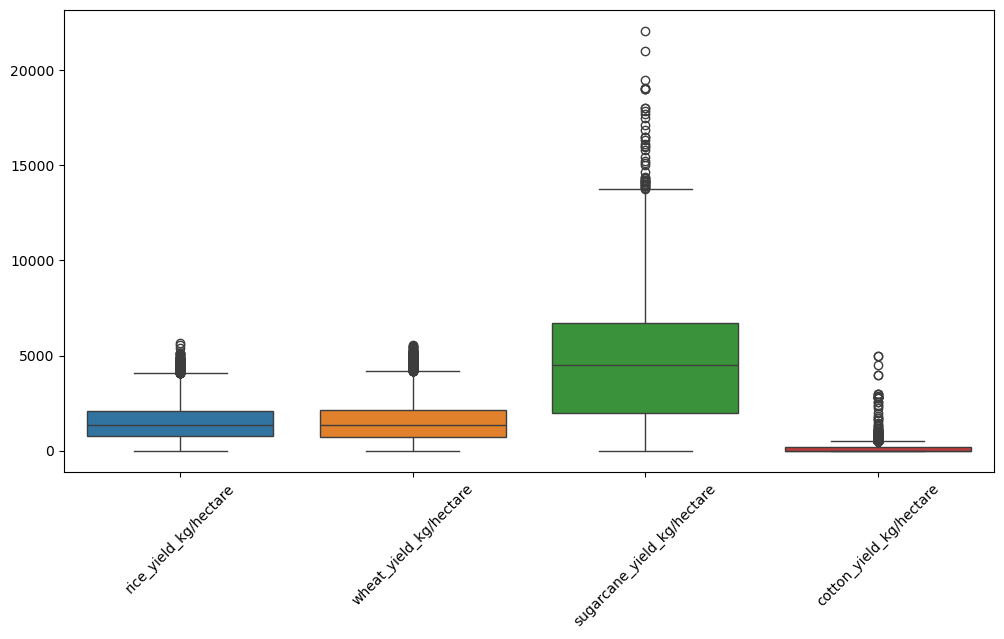

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["rice_yield_kg/hectare","wheat_yield_kg/hectare","sugarcane_yield_kg/hectare","cotton_yield_kg/hectare"]])
plt.xticks(rotation=45)
plt.show()

In [25]:
df.columns

Index(['dist_code', 'year', 'state_code', 'state', 'district',
       'rice_area_hectares', 'rice_production_tons', 'rice_yield_kg/hectare',
       'wheat_area_hectares', 'wheat_production_tons',
       'wheat_yield_kg/hectare', 'kharif_sorghum_area_hectares',
       'kharif_sorghum_production_tons', 'kharif_sorghum_yield_kg/hectare',
       'rabi_sorghum_area_hectares', 'rabi_sorghum_production_tons',
       'rabi_sorghum_yield_kg/hectare', 'sorghum_area_hectares',
       'sorghum_production_tons', 'sorghum_yield_kg/hectare',
       'pearl_millet_area_hectares', 'pearl_millet_production_tons',
       'pearl_millet_yield_kg/hectare', 'maize_area_hectares',
       'maize_production_tons', 'maize_yield_kg/hectare',
       'finger_millet_area_hectares', 'finger_millet_production_tons',
       'finger_millet_yield_kg/hectare', 'barley_area_hectares',
       'barley_production_tons', 'barley_yield_kg/hectare',
       'chickpea_area_hectares', 'chickpea_production_tons',
       'chickpea_yie

In [26]:
yield_columns = [
    "rice_yield_kg/hectare", 
    "wheat_yield_kg/hectare", 
    "sugarcane_yield_kg/hectare", 
    "cotton_yield_kg/hectare"
]
for col in yield_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col]>lower_bound)&((df[col]<upper_bound))]



In [27]:
df.shape

(15064, 80)

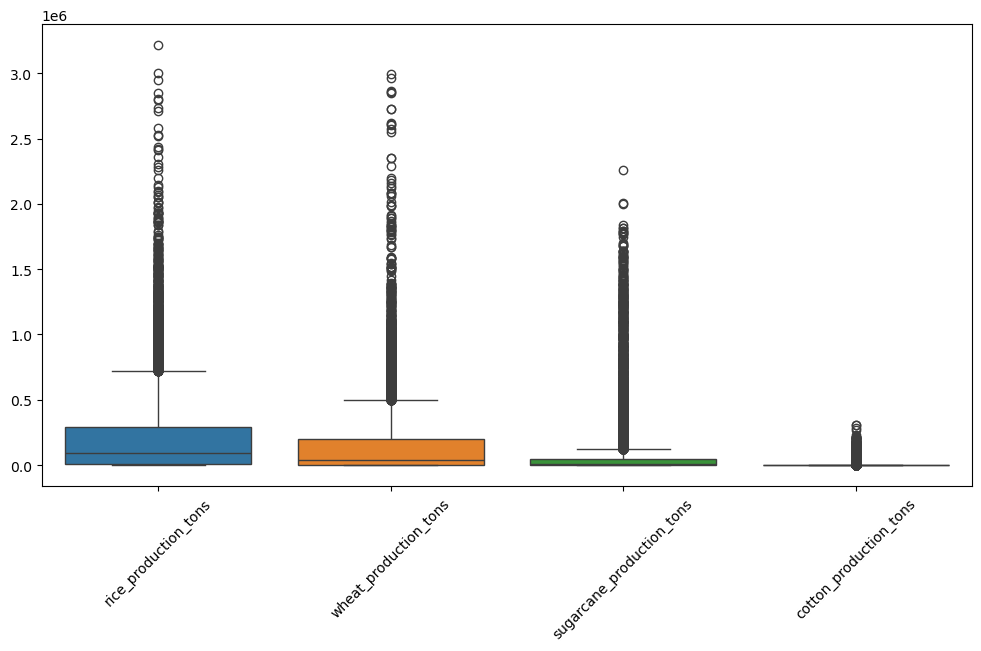

In [28]:
#check for outliers in production
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["rice_production_tons","wheat_production_tons","sugarcane_production_tons","cotton_production_tons"]])
plt.xticks(rotation=45)
plt.show()

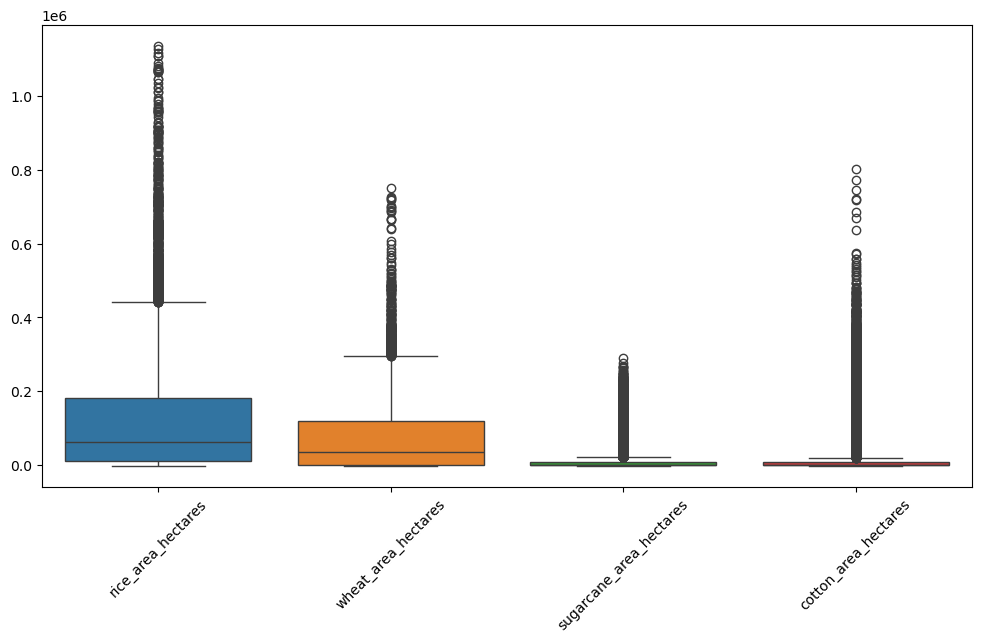

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["rice_area_hectares","wheat_area_hectares","sugarcane_area_hectares","cotton_area_hectares"]])
plt.xticks(rotation=45)
plt.show()

<Axes: >

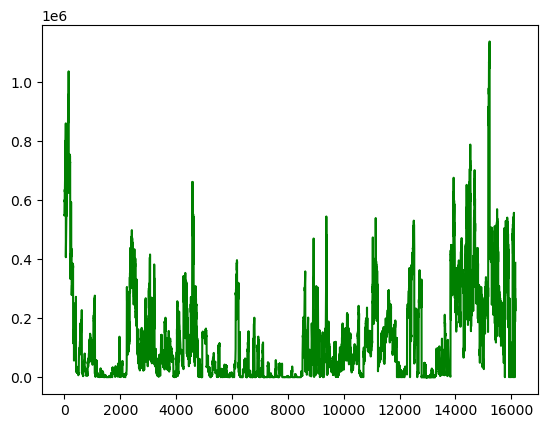

In [54]:
df["rice_area_hectares"].plot(kind='line',color='green')

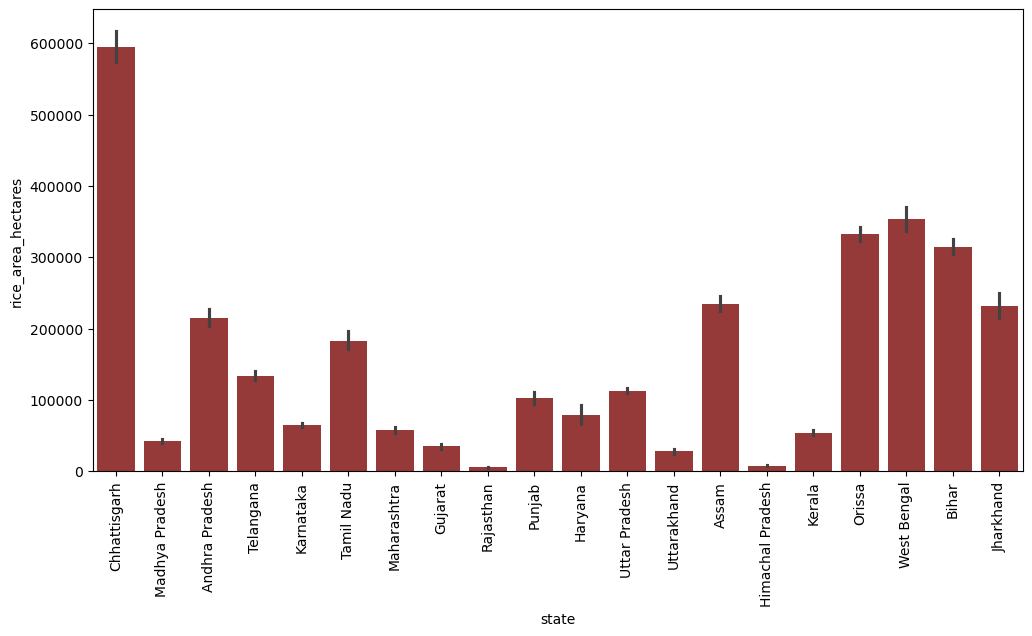

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=df["state"],y=df["rice_area_hectares"],color="brown")
plt.xticks(rotation=90)
plt.show()

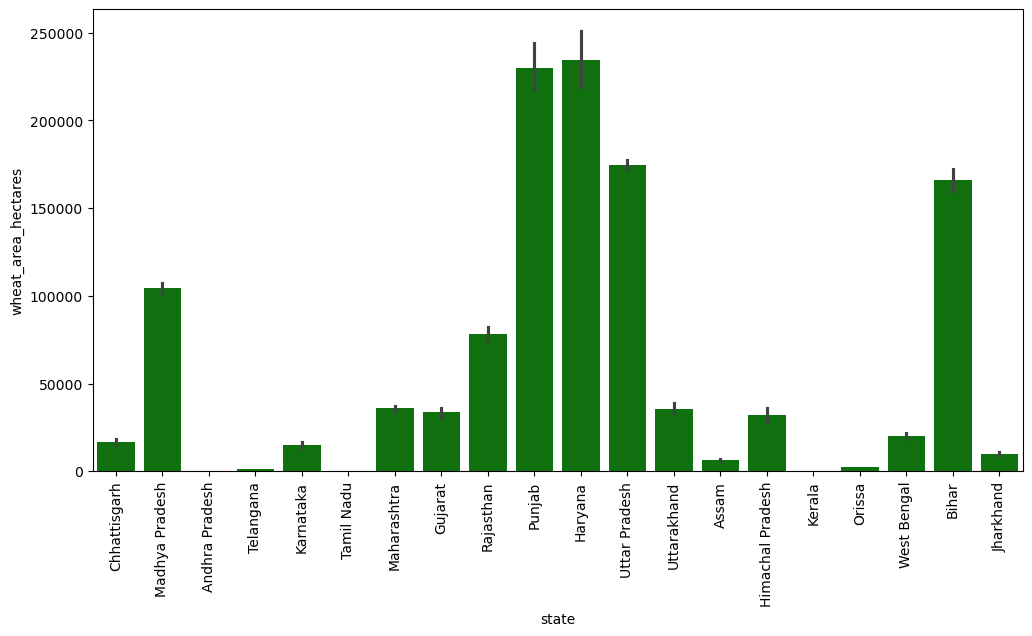

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=df["state"],y=df["wheat_area_hectares"],color="green")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of Rice Production (Tons)')

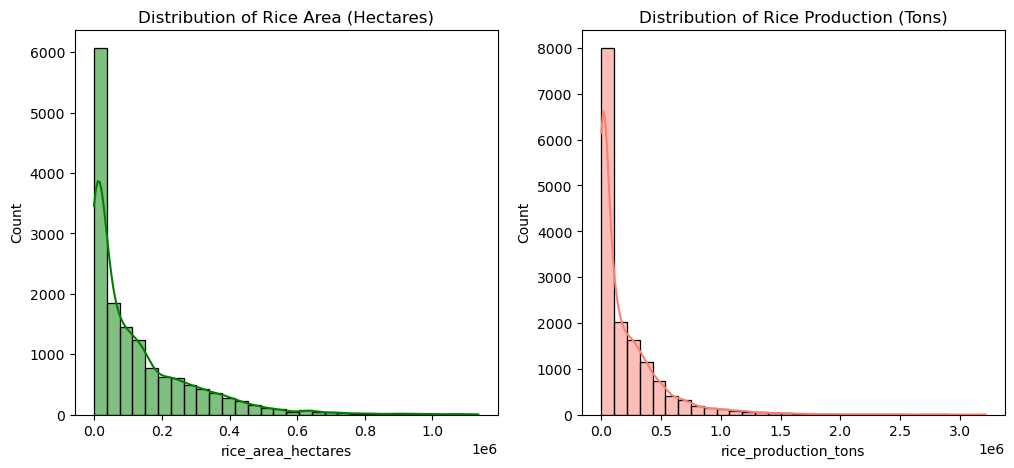

In [50]:
# check for distribution is skewed or normal
plt.figure(figsize=(12, 5))

# Rice Area
plt.subplot(1, 2, 1)
sns.histplot(df["rice_area_hectares"], bins=30, kde=True, color="green")
plt.title("Distribution of Rice Area (Hectares)")

# Rice Production
plt.subplot(1, 2, 2)
sns.histplot(df["rice_production_tons"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Rice Production (Tons)")

Text(0.5, 1.0, 'Distribution of Wheat Production (Tons)')

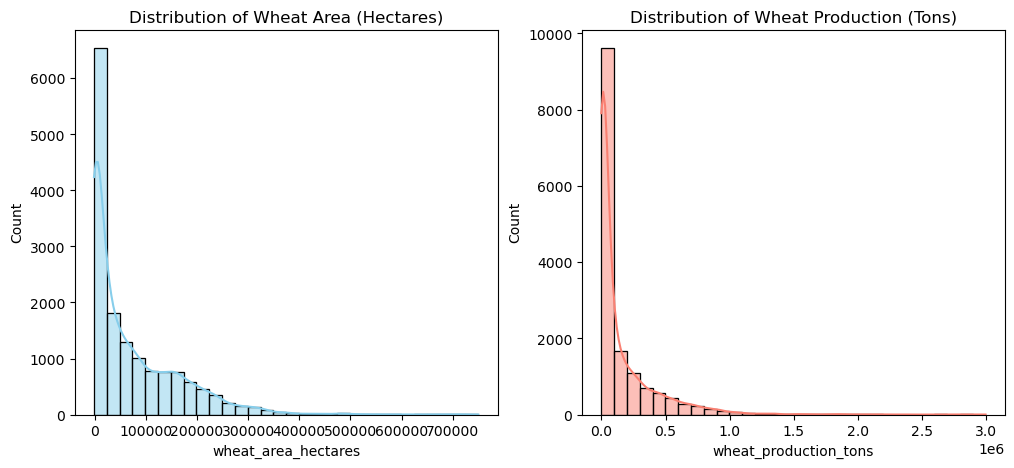

In [32]:
# check for distribution is skewed or normal
plt.figure(figsize=(12, 5))

# Rice Area
plt.subplot(1, 2, 1)
sns.histplot(df["wheat_area_hectares"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Wheat Area (Hectares)")

# Rice Production
plt.subplot(1, 2, 2)
sns.histplot(df["wheat_production_tons"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Wheat Production (Tons)")

Text(0.5, 1.0, 'Distribution of sugarcane Production (Tons)')

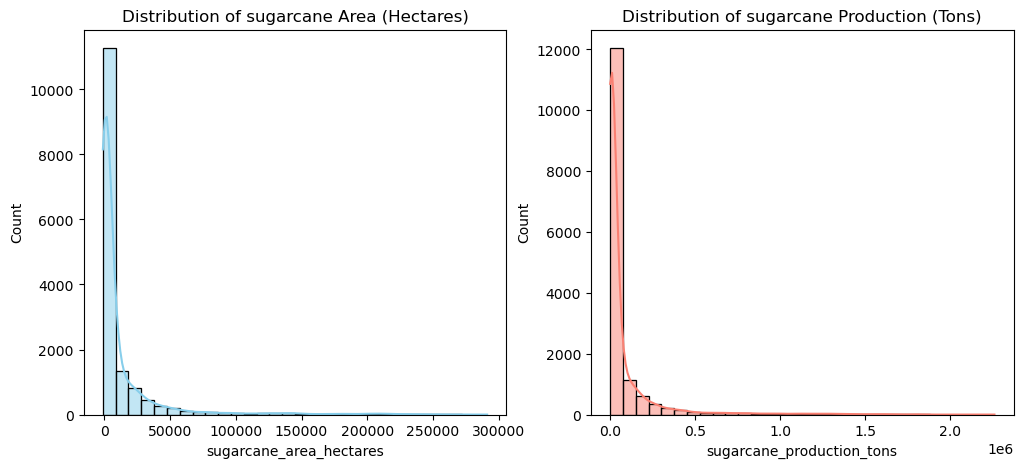

In [33]:
# check for distribution is skewed or normal
plt.figure(figsize=(12, 5))

# Rice Area
plt.subplot(1, 2, 1)
sns.histplot(df["sugarcane_area_hectares"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of sugarcane Area (Hectares)")

# Rice Production
plt.subplot(1, 2, 2)
sns.histplot(df["sugarcane_production_tons"], bins=30, kde=True, color="salmon")
plt.title("Distribution of sugarcane Production (Tons)")

<Figure size 800x500 with 0 Axes>

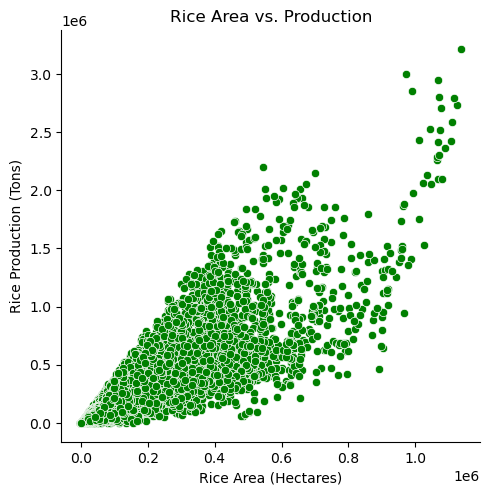

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
#see the relation between area and production
plt.figure(figsize=(8, 5))
sns.relplot(x=df["rice_area_hectares"], y=df["rice_production_tons"],color='green')
plt.xlabel("Rice Area (Hectares)")
plt.ylabel("Rice Production (Tons)")
plt.title("Rice Area vs. Production")
plt.show()

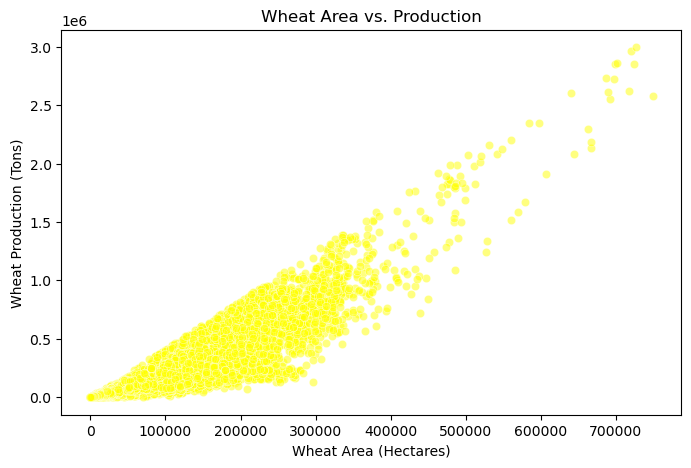

In [42]:
#see the relation between area and production
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["wheat_area_hectares"], y=df["wheat_production_tons"], alpha=0.5,color='yellow')
plt.xlabel("Wheat Area (Hectares)")
plt.ylabel("Wheat Production (Tons)")
plt.title("Wheat Area vs. Production")
plt.show()

<Figure size 800x500 with 0 Axes>

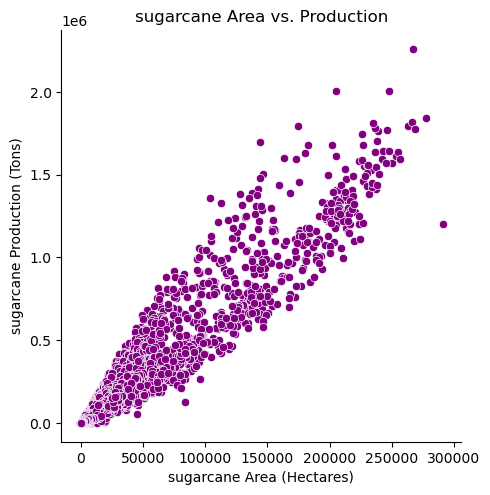

In [ ]:
#see the relation between area and production
plt.figure(figsize=(8, 5))
sns.relplot(x=df["sugarcane_area_hectares"], y=df["sugarcane_production_tons"], color='purple')
plt.xlabel("sugarcane Area (Hectares)")
plt.ylabel("sugarcane Production (Tons)")
plt.title("sugarcane Area vs. Production")
plt.show()

<Figure size 800x500 with 0 Axes>

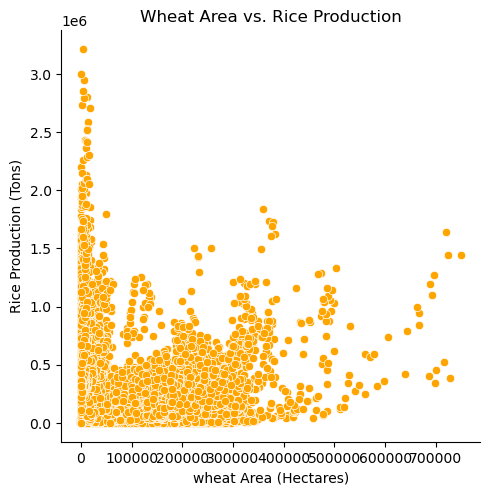

In [46]:
plt.figure(figsize=(8, 5))
sns.relplot(x=df["wheat_area_hectares"], y=df["rice_production_tons"], color='orange')
plt.xlabel("wheat Area (Hectares)")
plt.ylabel("Rice Production (Tons)")
plt.title("Wheat Area vs. Rice Production")
plt.show()

<Figure size 800x500 with 0 Axes>

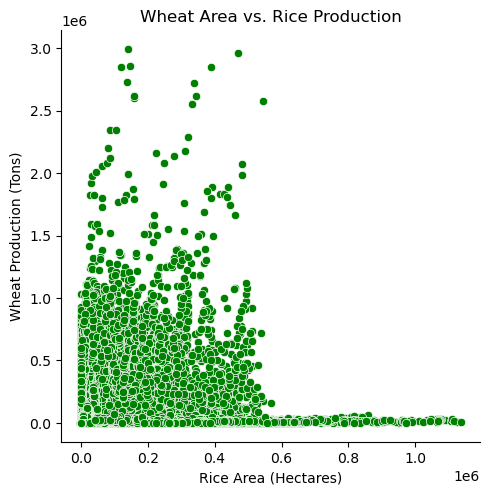

In [ ]:
plt.figure(figsize=(8, 5))
sns.relplot(x=df["rice_area_hectares"], y=df["wheat_production_tons"], color='green')
plt.xlabel("Rice Area (Hectares)")
plt.ylabel("Wheat Production (Tons)")
plt.title("Rice Area vs. Wheat Production")
plt.show()

Text(0.5, 1.0, 'Chickpeas Production Over Time')

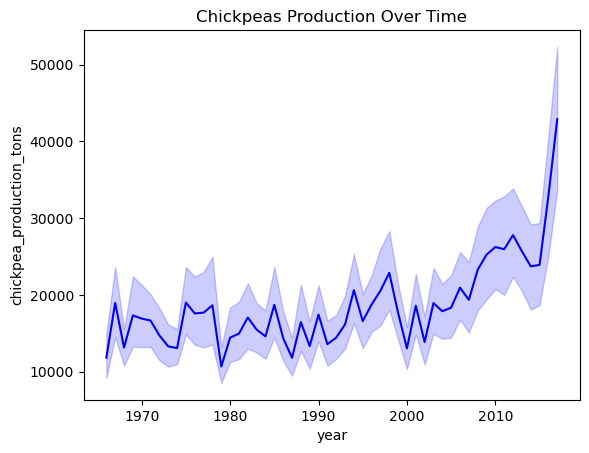

In [76]:
sns.lineplot(x=df['year'],y=df["chickpea_production_tons"],color='blue')
plt.title("Chickpeas Production Over Time")

Text(0.5, 1.0, 'Barley Production Over Time')

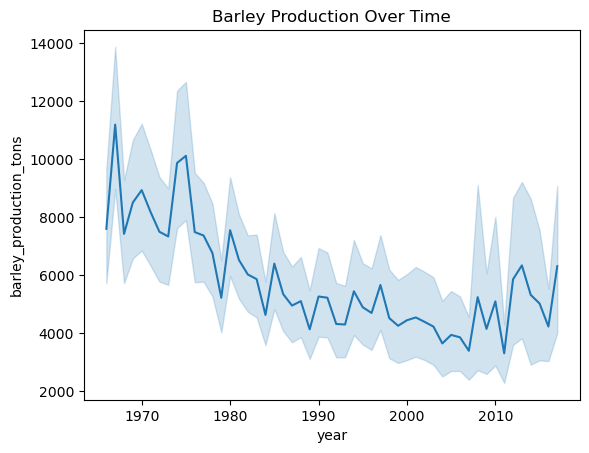

In [77]:
sns.lineplot(x=df['year'],y=df['barley_production_tons'])
plt.title("Barley Production Over Time")

Text(0.5, 1.0, 'Maize Production Over Time')

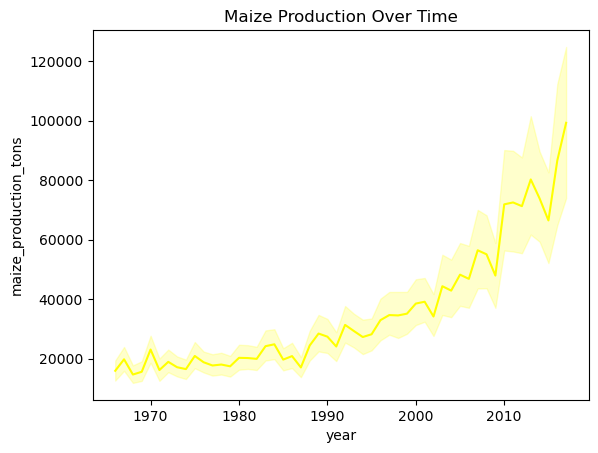

In [74]:
sns.lineplot(x=df['year'],y=df['maize_production_tons'],color='yellow')
plt.title("Maize Production Over Time")

Text(0.5, 1.0, 'oilseeds Production Over Time')

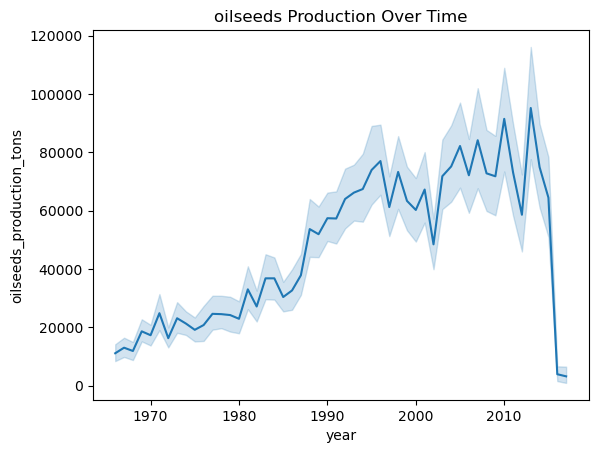

In [ ]:
sns.lineplot(x=df['year'],y=df['oilseeds_production_tons'])
plt.title("oilseeds Production Over Time")

Text(0.5, 1.0, 'SunFlower Production Over Time')

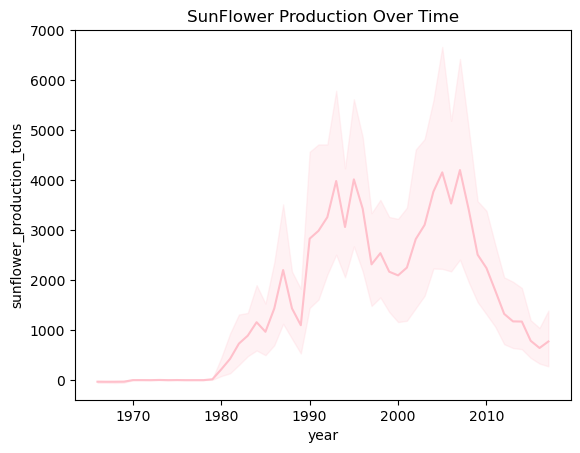

In [78]:
sns.lineplot(x=df['year'],y=df['sunflower_production_tons'],color='pink')
plt.title("SunFlower Production Over Time")

Text(0.5, 1.0, 'Finger millet Production Over Time')

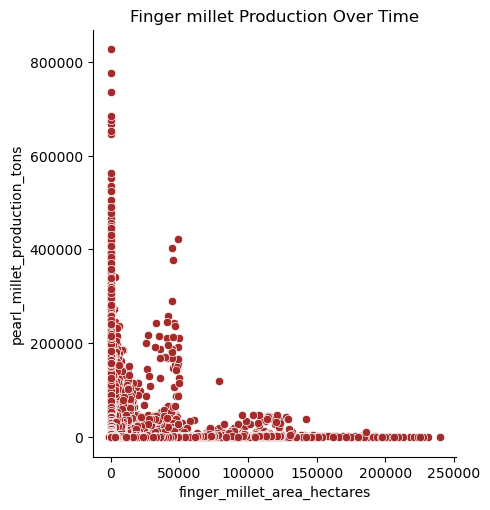

In [91]:
sns.relplot(y=df['pearl_millet_production_tons'],x=df['finger_millet_area_hectares'],color='brown')
plt.title("Finger millet Production Over Time")

In [92]:
df.columns

Index(['dist_code', 'year', 'state_code', 'state', 'district',
       'rice_area_hectares', 'rice_production_tons', 'rice_yield_kg/hectare',
       'wheat_area_hectares', 'wheat_production_tons',
       'wheat_yield_kg/hectare', 'kharif_sorghum_area_hectares',
       'kharif_sorghum_production_tons', 'kharif_sorghum_yield_kg/hectare',
       'rabi_sorghum_area_hectares', 'rabi_sorghum_production_tons',
       'rabi_sorghum_yield_kg/hectare', 'sorghum_area_hectares',
       'sorghum_production_tons', 'sorghum_yield_kg/hectare',
       'pearl_millet_area_hectares', 'pearl_millet_production_tons',
       'pearl_millet_yield_kg/hectare', 'maize_area_hectares',
       'maize_production_tons', 'maize_yield_kg/hectare',
       'finger_millet_area_hectares', 'finger_millet_production_tons',
       'finger_millet_yield_kg/hectare', 'barley_area_hectares',
       'barley_production_tons', 'barley_yield_kg/hectare',
       'chickpea_area_hectares', 'chickpea_production_tons',
       'chickpea_yie

<Axes: xlabel='rapeseed_and_mustard_production_tons', ylabel='Count'>

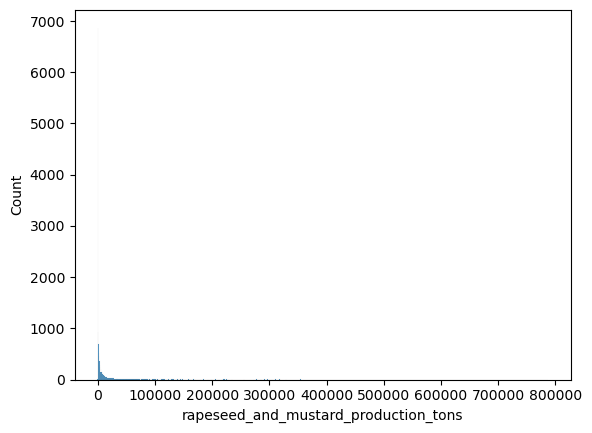

In [96]:
sns.histplot(data=df,x="rapeseed_and_mustard_production_tons")

<Axes: xlabel='minor_pulses_production_tons', ylabel='Count'>

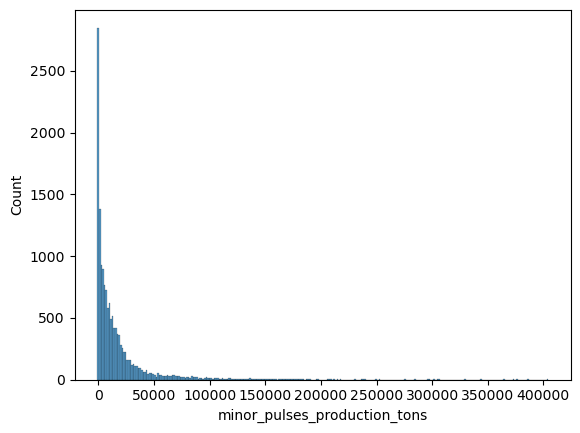

In [97]:
sns.histplot(data=df,x="minor_pulses_production_tons")

<Axes: xlabel='safflower_production_tons', ylabel='Count'>

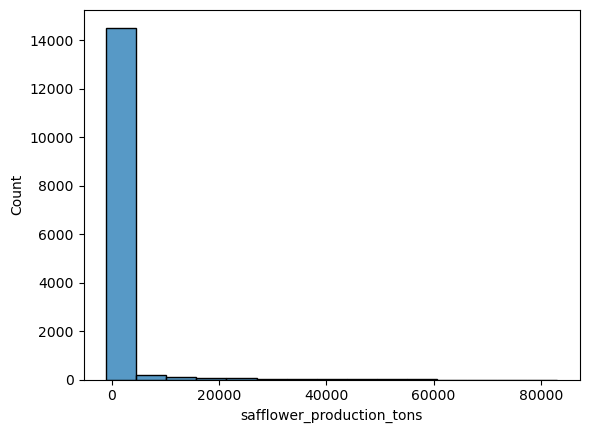

In [98]:
sns.histplot(data=df,x="safflower_production_tons")

Text(0.5, 1.0, 'Finger millet Production Over Time')

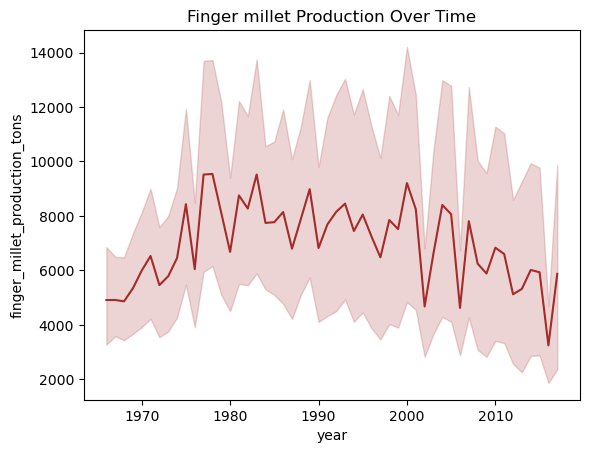

In [116]:
sns.lineplot(x=df['year'],y=df['finger_millet_production_tons'],color='brown')
plt.title("Finger millet Production Over Time")

Text(0.5, 1.0, 'pearl millet Production Over Time')

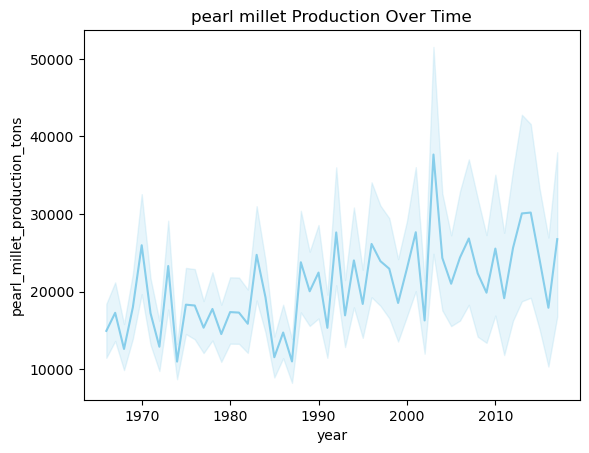

In [117]:
sns.lineplot(x=df['year'],y=df['pearl_millet_production_tons'],color='skyblue')
plt.title("pearl millet Production Over Time")

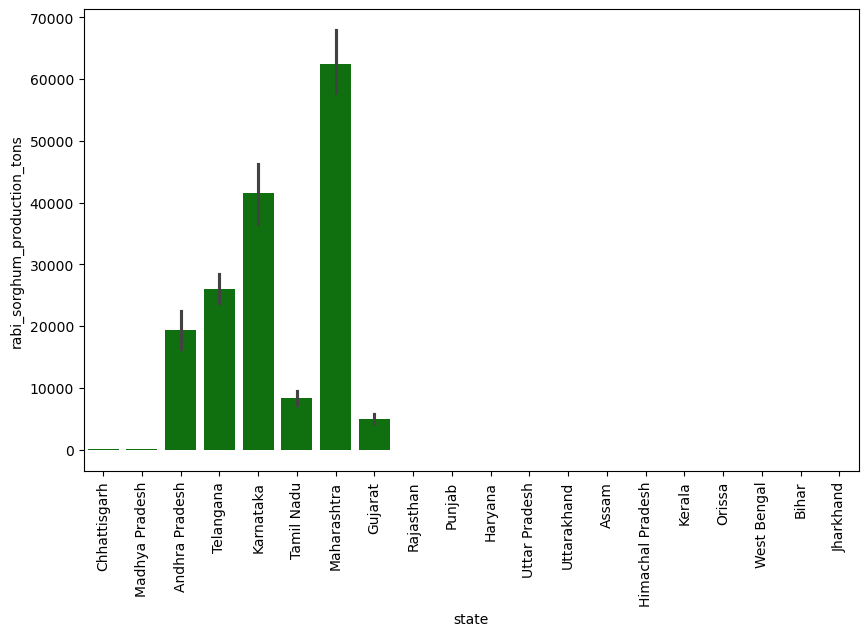

In [118]:
# rabi sorghum productions
plt.figure(figsize=(10,6))


sns.barplot(data=df,x=df["state"],y=df["rabi_sorghum_production_tons"],color="green")
plt.xticks(rotation=90)
plt.show()




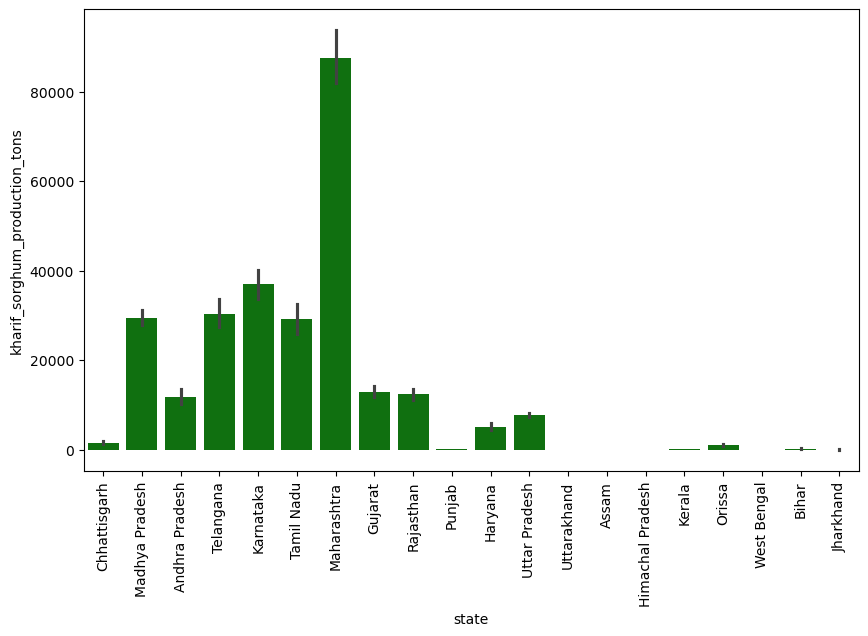

In [119]:
# Kharif sorghum productions
plt.figure(figsize=(10,6))
sns.barplot(data=df,x=df["state"],y=df["kharif_sorghum_production_tons"],color="green")
plt.xticks(rotation=90)
plt.show()

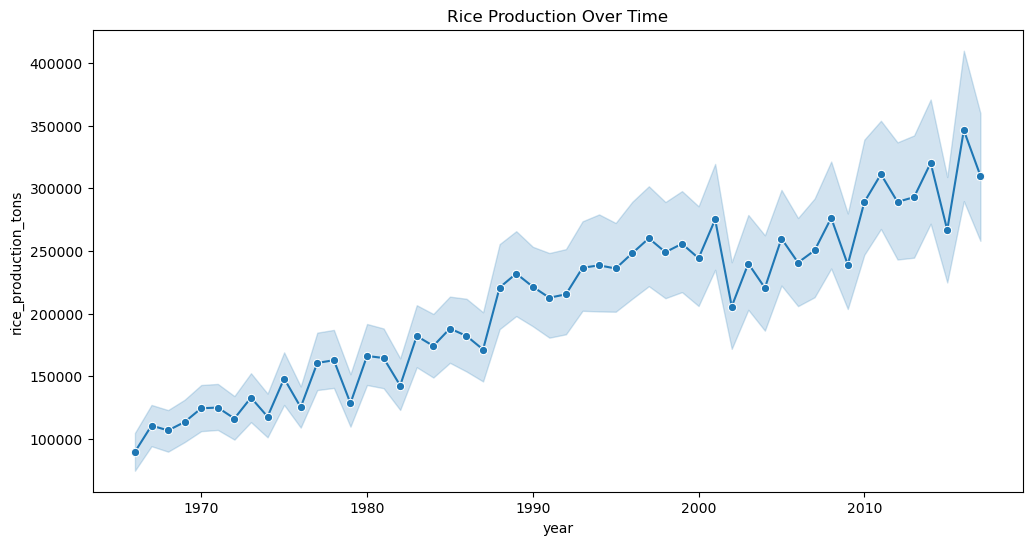

In [120]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="rice_production_tons", data=df, marker="o")
plt.title("Rice Production Over Time")
plt.show()


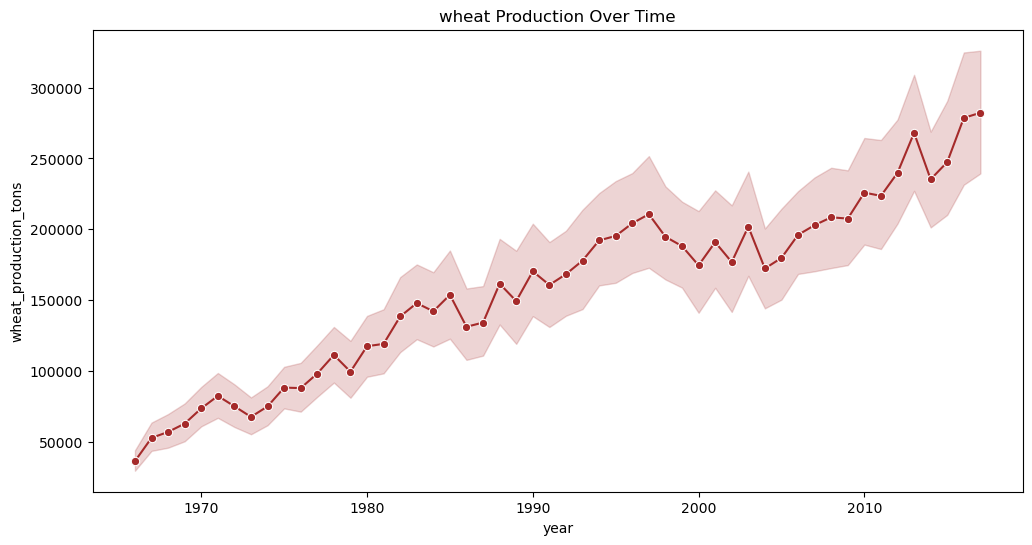

In [38]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="wheat_production_tons", data=df, marker="o",color='brown')
plt.title("wheat Production Over Time")
plt.show()

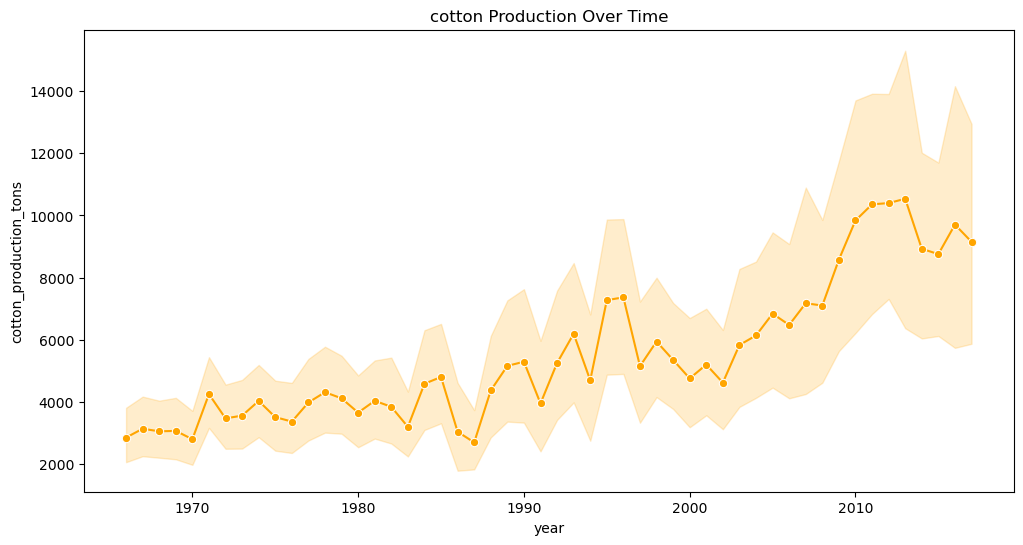

In [121]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="cotton_production_tons", data=df, marker="o",color='orange')
plt.title("cotton Production Over Time")
plt.show()

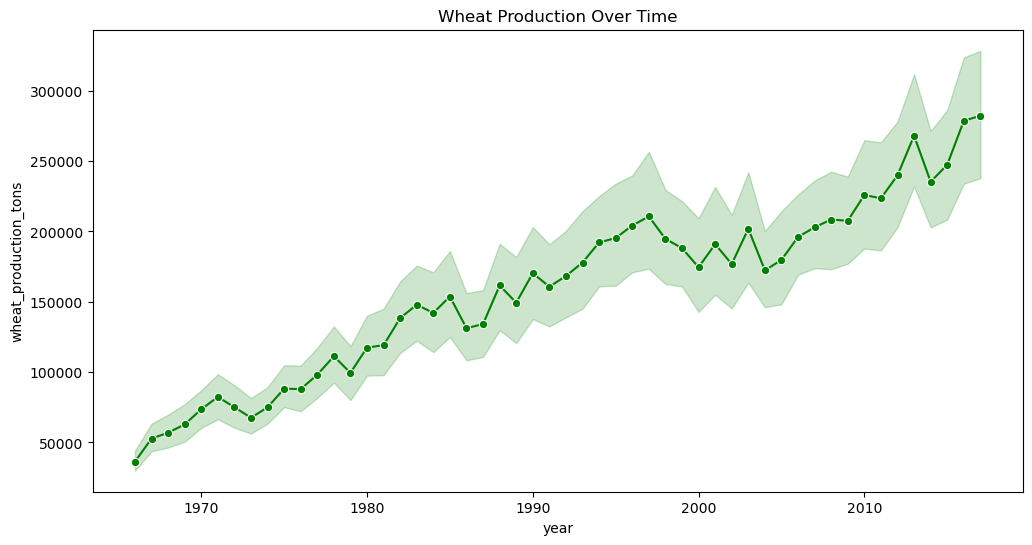

In [122]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="wheat_production_tons", data=df, marker="o",color='green')
plt.title("Wheat Production Over Time")
plt.show()

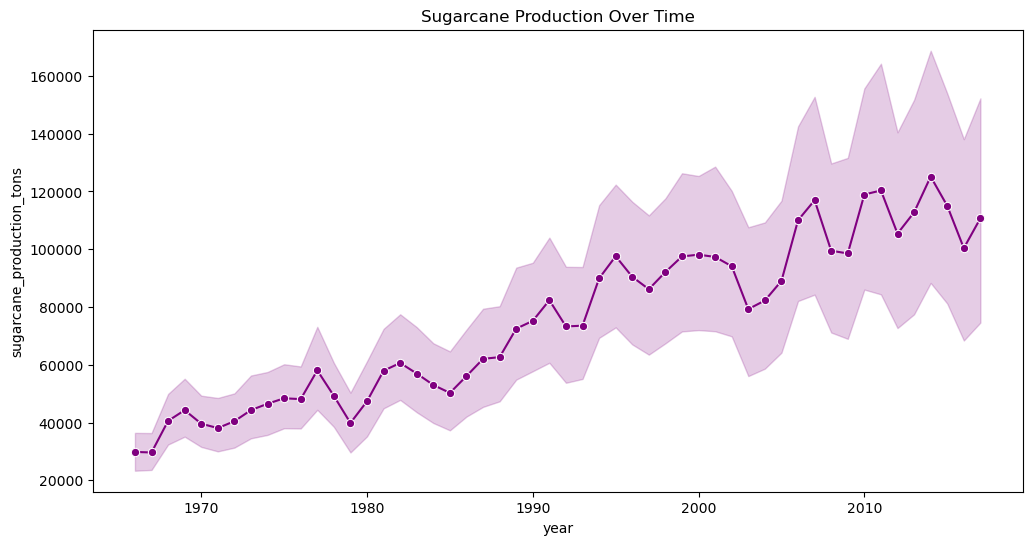

In [123]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="sugarcane_production_tons", data=df, marker="o",color='purple')
plt.title("Sugarcane Production Over Time")
plt.show()

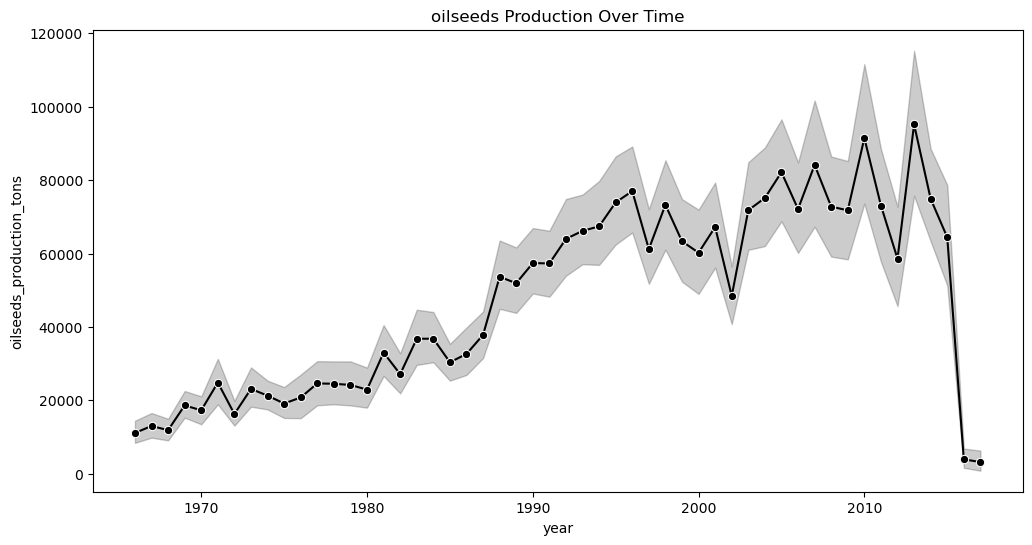

In [124]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="oilseeds_production_tons", data=df, marker="o",color='black')
plt.title("oilseeds Production Over Time")
plt.show()

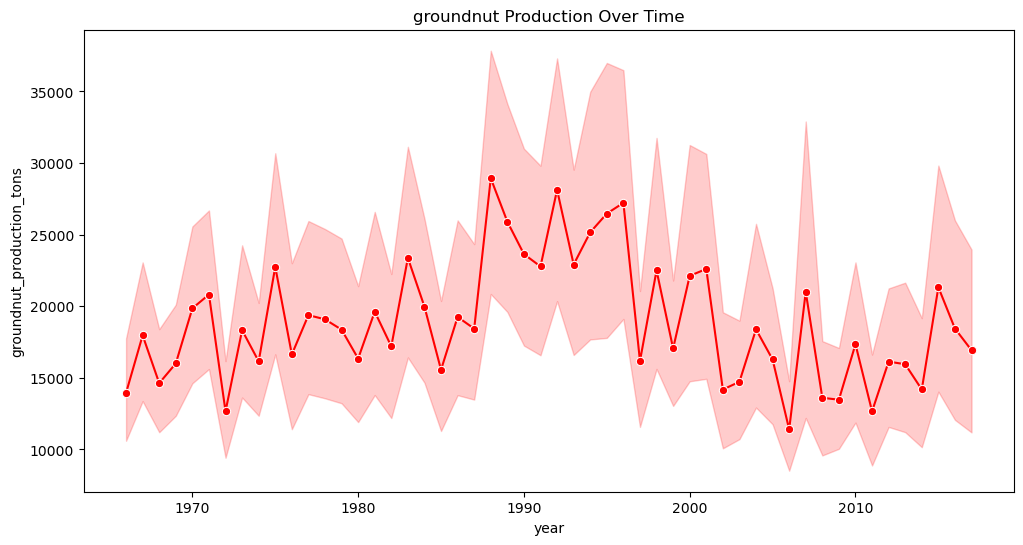

In [125]:
#crop yield over time
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="groundnut_production_tons", data=df, marker="o",color='red')
plt.title("groundnut Production Over Time")
plt.show()



<Axes: xlabel='year', ylabel='fruits_and_vegetables_area_hectares'>

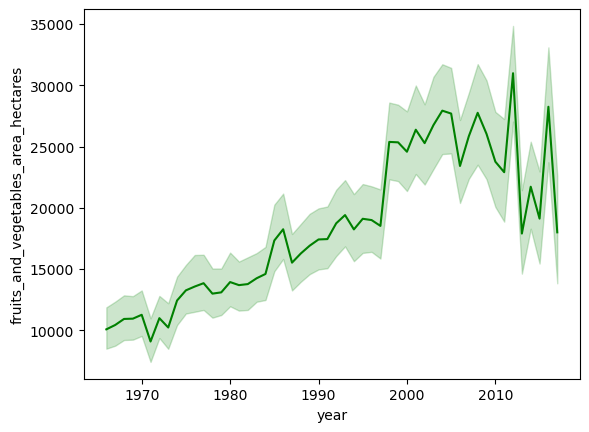

In [126]:
sns.lineplot(data=df,x=df["year"],y=df["fruits_and_vegetables_area_hectares"],color='green')

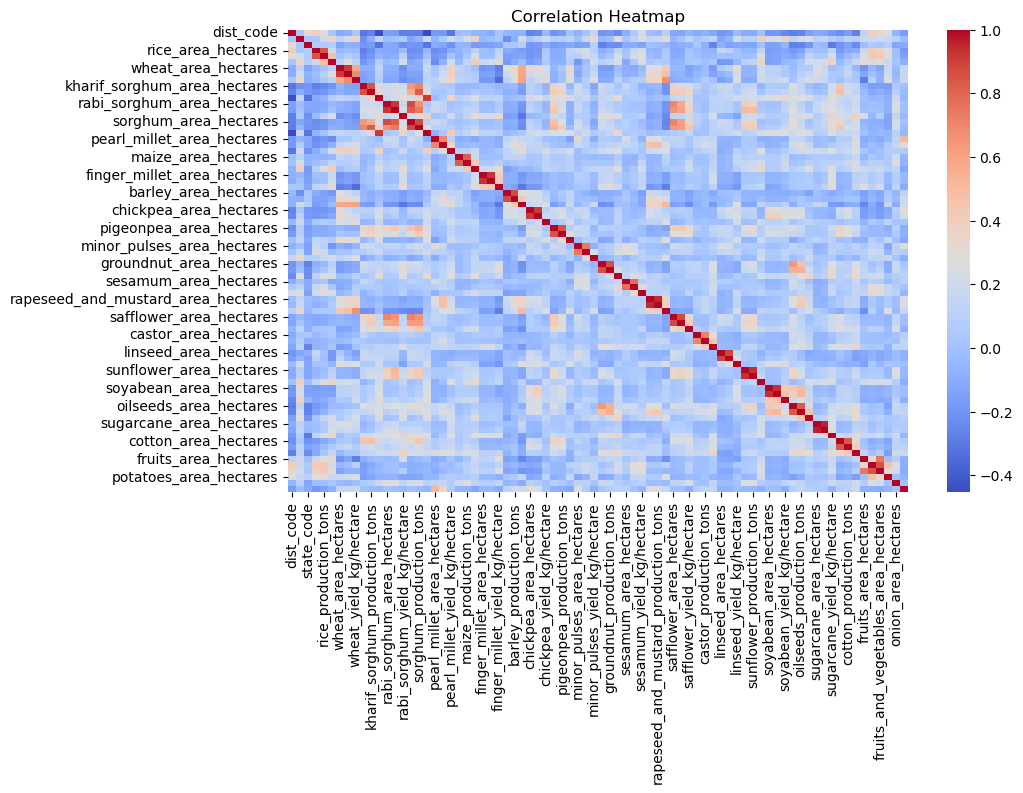

In [127]:

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [128]:
#save the dataframe in csv
df.to_csv("agro_data.csv")
